<h1> EDA и подготовка данных (Часть 1)</h1>

Здесь приведен краткий разведочный анализ данных и предподготовка данных для дальнейшей обработки.

<h3>EDA</h3>

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
splits = {'train': 'sberquad/train-00000-of-00001.parquet', 'validation': 'sberquad/validation-00000-of-00001.parquet', 'test': 'sberquad/test-00000-of-00001.parquet'}
df_train = pd.read_parquet("hf://datasets/kuznetsoffandrey/sberquad/" + splits["train"])
df_val = pd.read_parquet("hf://datasets/kuznetsoffandrey/sberquad/" + splits["validation"])
df_test = pd.read_parquet("hf://datasets/kuznetsoffandrey/sberquad/" + splits["test"])

In [7]:
df_train.head()

,id,title,context,question,answers
0,62310,SberChallenge,В протерозойских отложениях органические остат...,чем представлены органические остатки?,{'text': ['известковыми выделениями сине-зелён...
1,28101,SberChallenge,В протерозойских отложениях органические остат...,что найдено в кремнистых сланцах железорудной ...,"{'text': ['нитевидные водоросли, грибные нити'..."
2,48834,SberChallenge,В протерозойских отложениях органические остат...,что встречается в протерозойских отложениях?,"{'text': ['органические остатки'], 'answer_sta..."
3,83056,SberChallenge,В протерозойских отложениях органические остат...,что относится к числу древнейших растительных ...,{'text': ['скопления графито-углистого веществ...
4,5816,SberChallenge,В протерозойских отложениях органические остат...,как образовалось графито-углистое вещество?,{'text': ['в результате разложения Corycium en...


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45328 entries, 0 to 45327
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        45328 non-null  int32 
 1   title     45328 non-null  object
 2   context   45328 non-null  object
 3   question  45328 non-null  object
 4   answers   45328 non-null  object
dtypes: int32(1), object(4)
memory usage: 1.6+ MB


In [9]:
df_test.head()

,id,title,context,question,answers
0,18009,SberChallenge,Многоклеточный организм — внесистематическая к...,У каких организмов отсутствуют настоящие диффе...,"{'text': [''], 'answer_start': [-1]}"
1,54494,SberChallenge,Многоклеточный организм — внесистематическая к...,"Какие животные появились на Земле 2,1 миллиард...","{'text': [''], 'answer_start': [-1]}"
2,56411,SberChallenge,Многоклеточный организм — внесистематическая к...,Когда предположительно появились многоклеточны...,"{'text': [''], 'answer_start': [-1]}"
3,20672,SberChallenge,Многоклеточный организм — внесистематическая к...,Как называется внесистематическая категория жи...,"{'text': [''], 'answer_start': [-1]}"
4,45545,SberChallenge,Многоклеточный организм — внесистематическая к...,"У какой категории живых организмов, тело котор...","{'text': [''], 'answer_start': [-1]}"


In [10]:
train_question_len = df_train['question'].apply(len)
val_question_len = df_val['question'].apply(len)
test_question_len = df_test['question'].apply(len)

print(f'Максимальная длина вопроса в train: {train_question_len.max()}')
print(f'Максимальная длина вопроса в validation: {val_question_len.max()}')
print(f'Максимальная длина вопроса в test: {test_question_len.max()}')
print()
print(f'Минимальная длина вопроса в train: {train_question_len.min()}')
print(f'Минимальная длина вопроса в validation: {val_question_len.min()}')
print(f'Минимальная длина вопроса в test: {test_question_len.min()}')

Максимальная длина вопроса в train: 670
Максимальная длина вопроса в validation: 471
Максимальная длина вопроса в test: 590

Минимальная длина вопроса в train: 8
Минимальная длина вопроса в validation: 10
Минимальная длина вопроса в test: 5


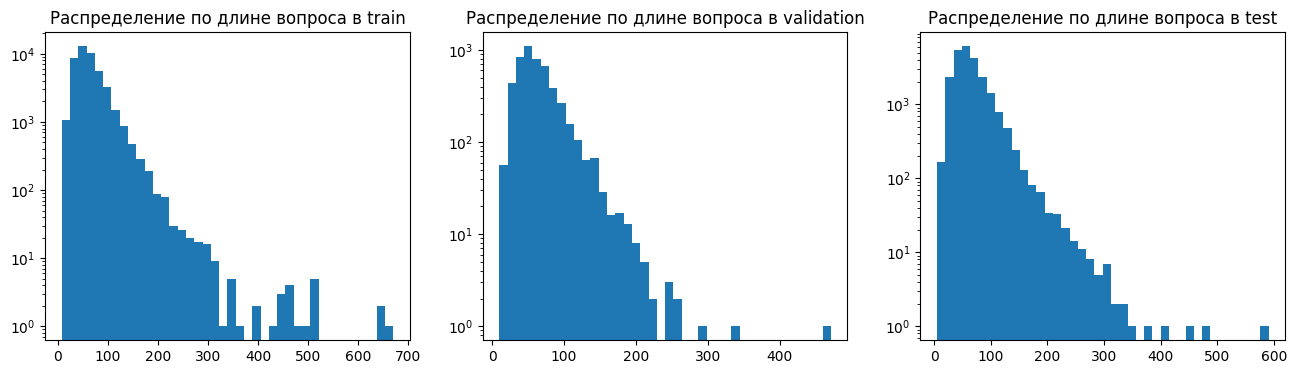

In [11]:
_, axes = plt.subplots(1, 3, figsize=(16, 4))
axes[0].hist(train_question_len, bins=40, log=True)
axes[0].set_title('Распределение по длине вопроса в train')

axes[1].hist(val_question_len, bins=40, log=True)
axes[1].set_title('Распределение по длине вопроса в validation')

axes[2].hist(test_question_len, bins=40, log=True)
axes[2].set_title('Распределение по длине вопроса в test')
plt.show()

In [12]:
train_context_len = df_train['context'].apply(len)
val_context_len = df_val['context'].apply(len)
test_context_len = df_test['context'].apply(len)

print(f'Максимальная длина контекста в train: {train_context_len.max()}')
print(f'Максимальная длина контекста в validation: {val_context_len.max()}')
print(f'Максимальная длина контекста в test: {test_context_len.max()}')
print()
print(f'Минимальная длина контекста в train: {train_context_len.min()}')
print(f'Минимальная длина контекста в validation: {val_context_len.min()}')
print(f'Минимальная длина контекста в test: {test_context_len.min()}')

Максимальная длина контекста в train: 7231
Максимальная длина контекста в validation: 3489
Максимальная длина контекста в test: 2834

Минимальная длина контекста в train: 279
Минимальная длина контекста в validation: 279
Минимальная длина контекста в test: 304


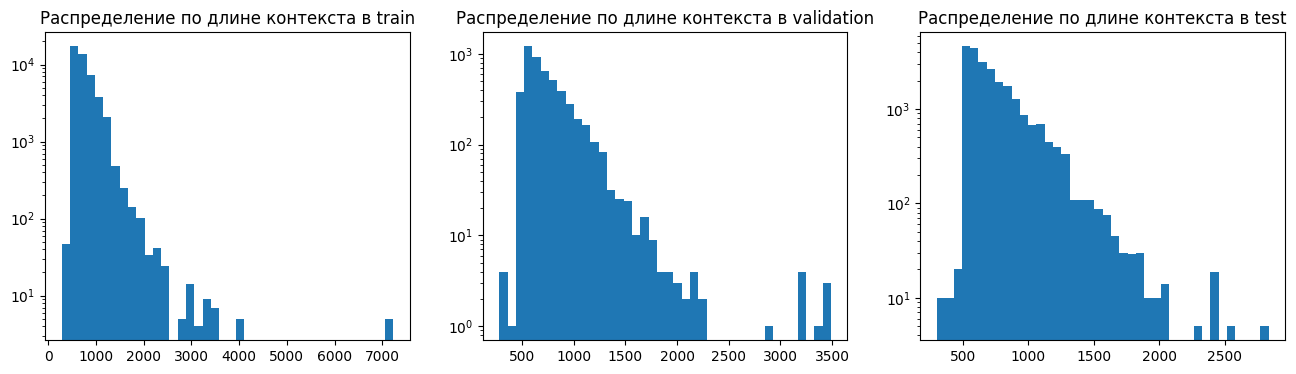

In [13]:
_, axes = plt.subplots(1, 3, figsize=(16, 4))
axes[0].hist(train_context_len, bins=40, log=True)
axes[0].set_title('Распределение по длине контекста в train')

axes[1].hist(val_context_len, bins=40, log=True)
axes[1].set_title('Распределение по длине контекста в validation')

axes[2].hist(test_context_len, bins=40, log=True)
axes[2].set_title('Распределение по длине контекста в test')
plt.show()

In [14]:
train_answer_len = df_train['answers'].apply(lambda x: x['text'][0]).apply(len)
val_answer_len = df_val['answers'].apply(lambda x: x['text'][0]).apply(len)

print(f'Максимальная длина ответа в train: {train_answer_len.max()}')
print(f'Минимальная длина ответа в train: {train_answer_len.min()}')
print()
print(f'Максимальная длина ответа в validation: {train_answer_len.max()}')
print(f'Минимальная длина ответа в validation: {train_answer_len.min()}')

Максимальная длина ответа в train: 673
Минимальная длина ответа в train: 1

Максимальная длина ответа в validation: 673
Минимальная длина ответа в validation: 1


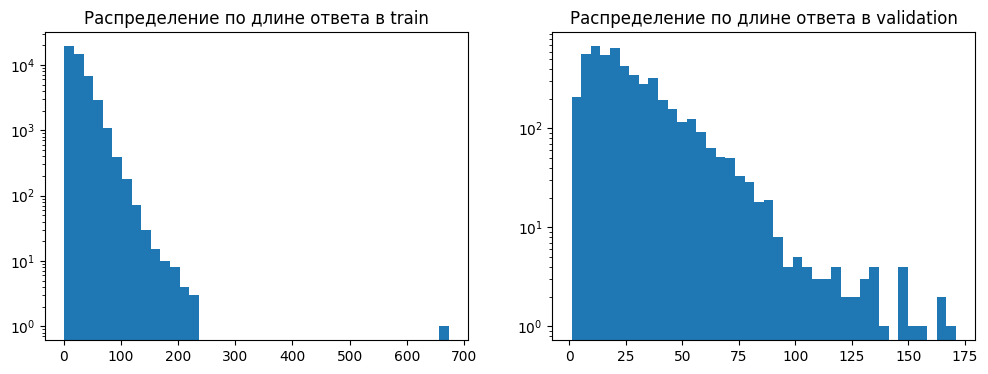

In [15]:
_, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(train_answer_len, bins=40, log=True)
axes[0].set_title('Распределение по длине ответа в train')

axes[1].hist(val_answer_len, bins=40, log=True)
axes[1].set_title('Распределение по длине ответа в validation')
plt.show()

In [15]:
print(f'Уникальных контекстов в train: {df_train["context"].nunique()}')
print(f'Уникальных контекстов в validation: {df_val["context"].nunique()}')
print(f'Уникальных контекстов в test: {df_test["context"].nunique()}')

all_contexts = pd.concat([df_train["context"], df_test["context"], df_val["context"]]).drop_duplicates().reset_index()
print(f'Уникальных контекстов в полном датасете: {all_contexts["context"].nunique()}')

Уникальных контекстов в train: 9078
Уникальных контекстов в validation: 3971
Уникальных контекстов в test: 4425
Уникальных контекстов в полном датасете: 13489


In [85]:
df = pd.concat([df_train, df_test, df_val]).reset_index(drop=True)
all_contexts = df[['context']].drop_duplicates()
all_contexts['id'] = pd.factorize(all_contexts['context'])[0] + 1
all_contexts = all_contexts.reset_index(drop=True)
all_contexts.head()

,context,id
0,В протерозойских отложениях органические остат...,1
1,Кишечник млекопитающего подразделяется на тонк...,2
2,Город Байконур и космодром Байконур вместе обр...,3
3,Вскоре после прибытия Колумба из Вест-Индии во...,4
4,Около Порт-Артура ночью на 27 января 1904 года...,5


In [86]:
def extract_questions(df: pd.DataFrame) -> pd.DataFrame:
    df['context_id'] = df['context'].map(all_contexts.set_index('context')['id'])
    df = df.drop(['title', 'context', 'answers'], axis=1)
    return df

questions_train = extract_questions(df_train)
questions_val = extract_questions(df_val)
questions_test = extract_questions(df_test)

In [87]:
questions_train.head()

,id,question,context_id
0,62310,чем представлены органические остатки?,1
1,28101,что найдено в кремнистых сланцах железорудной ...,1
2,48834,что встречается в протерозойских отложениях?,1
3,83056,что относится к числу древнейших растительных ...,1
4,5816,как образовалось графито-углистое вещество?,1


In [88]:
def extract_answers(df: pd.DataFrame) -> pd.DataFrame:
    df = df[['id', 'answers']]
    return df.rename(columns={"id": "question_id"})

answers_train = extract_answers(df_train)
answers_val = extract_answers(df_val)
answers_test = extract_answers(df_test)

answers_train.head()

,question_id,answers
0,62310,{'text': ['известковыми выделениями сине-зелён...
1,28101,"{'text': ['нитевидные водоросли, грибные нити'..."
2,48834,"{'text': ['органические остатки'], 'answer_sta..."
3,83056,{'text': ['скопления графито-углистого веществ...
4,5816,{'text': ['в результате разложения Corycium en...


In [94]:
import os
os.chdir('./data')

In [96]:
all_contexts.to_csv('contexts.csv')

questions_train.to_csv('questions_train.csv')
questions_val.to_csv('questions_val.csv')
questions_test.to_csv('questions_test.csv')

answers_train.to_csv('answers_train.csv')
answers_val.to_csv('answers_val.csv')
answers_test.to_csv('answers_test.csv')